In [91]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df1=pd.read_csv("train.csv")
df2=pd.read_csv("test.csv")

Number : 7


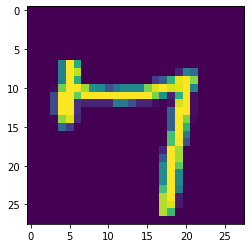

In [92]:
s1=df1.iloc[120,1:]
s1=np.array(s1).reshape((28,28))
print('Number :',df1.iloc[120,0])
imgplot = plt.imshow(s1)

In [100]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 

onehot_encoder = OneHotEncoder(sparse=False)
df3 = pd.DataFrame(onehot_encoder.fit_transform(np.array(df1['label']).reshape((-1,1))))
for col in df3.columns:
    df1[col]=df3[col]


In [119]:
from tensorflow import keras
from tensorflow.keras import layers
model=keras.Sequential(
    [
    layers.Dense(5,activation="relu"),
    layers.Dense(5,activation="relu"),
    layers.Dense(5,activation="relu"),
    layers.Dense(10,activation="softmax"),
    ])
x=(df1.iloc[:,1:785])
y=df1.drop(x.columns,axis=1)
y=np.array(y.drop('label',axis=1))
x=np.array(x)

In [142]:
op=model(x)

In [146]:
op[1000]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1.0364851e-15, 1.9500393e-17, 0.0000000e+00, 1.2497377e-17,
       2.8009989e-22, 0.0000000e+00, 2.3346743e-25, 1.6017582e-26,
       8.3040513e-18, 1.0000000e+00], dtype=float32)>

In [144]:
op1=tf.math.argmax(op,axis=1)